In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = 'c7825a5cbc5240d2a9245f8ec5ccc703'



In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='bitcoin', language="en")
bitcoin_news['articles'][0]


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Violet Blue',
 'title': "Twitter's Bitcoin hackers had almost limitless access",
 'description': 'On Wednesday, July 15, Twitter was the target of a very public hack attack that’s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world’…',
 'url': 'https://www.engadget.com/twitter-bitcoin-scam-social-engineering-hack-access-193040357.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-07%2Fca68c900-c85d-11ea-b9df-6238180027a8&client=amp-blogside-v2&signature=9b0fbb183070e467429323ab75f41cbbe1c8dbc3',
 'publishedAt': '2020-07-17T19:30:40Z',
 'content': 'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the accou

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='ethereum', language='en')
ethereum_news['articles'][0]

{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Banks Can Now Hold Cryptocurrencies, As a Treat',
 'description': 'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.Read more...',
 'url': 'https://gizmodo.com/banks-can-now-hold-cryptocurrencies-as-a-treat-1844473085',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/ur0b3oxdebji9s0boue7.jpg',
 'publishedAt': '2020-07-22T21:45:00Z',
 'content': 'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


bitcoin_sentiment = []
for article in bitcoin_news["articles"]:
    try:
        
        text = article["content"]
#         print(text)
        date = article["publishedAt"][:10]
        
        sentiment = analyzer.polarity_scores(text)
        
        compound = sentiment["compound"]
        
        pos = sentiment["pos"]
       
        neu = sentiment["neu"]
        
        neg = sentiment["neg"]
        
        
        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
            
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df.head()



         



,compound,date,negative,neutral,positive,text
0,0.0258,2020-07-17,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0772,2020-07-16,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
2,0.0000,2020-07-16,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
3,0.5994,2020-07-18,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.6369,2020-07-28,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentimentdf = []
for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentimentdf.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
        
ethereum_df = pd.DataFrame(ethereum_sentimentdf)  
ethereum_sentimentdf


[{'text': 'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars]',
  'date': '2020-07-22',
  'compound': 0.5719,
  'positive': 0.132,
  'negative': 0.0,
  'neutral': 0.868},
 {'text': 'When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probably worth paying attention. Vendia, as the new venture is called, com… [+4751 chars]',
  'date': '2020-07-01',
  'compound': 0.2263,
  'positive': 0.053,
  'negative': 0.0,
  'neutral': 0.947},
 {'text': 'Enlarge/ A screenshot from Wozniak\'s lawsuit shows a typical "Bitcoin giveaway" scam video on YouTube.\r\n4 with 4 posters participating\r\nApple co-founder Steve Wozniak has sued YouTube over the prolif… [+3424 chars]',
  'date': '2020-07-23',
  'compound': -0.6808,
  'positive': 0.0,
  'negative': 0.177,
  'neutr

In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.214625,0.090200,0.863800,0.046000
std,0.462797,0.084929,0.077649,0.044974
min,-0.880400,0.000000,0.687000,0.000000
25%,-0.629500,0.000000,0.834250,0.000000
50%,-0.235650,0.073500,0.858500,0.044000
75%,0.089900,0.145500,0.919500,0.066250
max,0.636900,0.277000,1.000000,0.149000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.100971,0.059235,0.860824,0.080000
std,0.493485,0.058487,0.092291,0.083301
min,-0.680800,0.000000,0.660000,0.000000
25%,-0.340000,0.000000,0.814000,0.000000
50%,0.226300,0.058000,0.868000,0.060000
75%,0.571900,0.102000,0.917000,0.136000
max,0.726900,0.177000,1.000000,0.226000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [12]:
# Expand the default stopwords list if necessary
stopwords = set(stopwords.words("english"))
stopwords = stopwords.union({"random"})

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    
    
    # Create a list of the words
    words= word_tokenize(text)
    # Convert the words to lowercase
    words = [word.lower() for word in words if word.lower() not in stopwords]
    # Remove the punctuation
    words = [word.lower() for word in words if word.lower() not in punctuation]
    
    # Lemmatize Words into root words
    words = [lemmatizer.lemmatize(word) for word in words]
    return words


In [14]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)

In [15]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bigram_countsbtc = Counter(ngrams(tokenizer(bitcoin_df["text"].str.cat()), n=2))
bigram_countsbtc.most_common(10)

[(('elon', 'musk'), 4),
 (('bill', 'gate'), 3),
 (('barack', 'obama'), 3),
 (('twitter', 'account'), 3),
 (('send', 'bitcoin'), 2),
 (('bitcoin', 'address'), 2),
 (('char', 'bitcoin'), 2),
 (('bitcoin', 'scam'), 2),
 (('char', 'image'), 2),
 (('kanye', 'west'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
bigram_countseth = Counter(ngrams(tokenizer(ethereum_df["text"].str.cat()), n=2))
bigram_countseth.most_common(10)

[(('last', 'week'), 2),
 (('paper', 'wallet'), 2),
 (('char', 'getty'), 2),
 (('weird', 'year'), 2),
 (('according', 'public'), 1),
 (('public', 'letter'), 1),
 (('letter', 'u.s.'), 1),
 (('u.s.', 'comptroller'), 1),
 (('comptroller', 'currency'), 1),
 (('currency', 'federal'), 1)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin

print(token_count(tokenizer(bitcoin_df['text'].str.cat())))


[('char', 20), ('twitter', 12), ('account', 12), ('bitcoin', 10), ('scam', 6), ('hacker', 5), ('investigation', 5), ('’', 4), ('would', 4), ('hack', 4)]


In [21]:
# Get the top 10 words for Ethereum
print(token_count(tokenizer(ethereum_df['text'].str.cat())))



[('char', 16), ('bitcoin', 11), ('ethereum', 9), ('crypto', 6), ('wallet', 5), ('’', 4), ('…', 4), ('cryptocurrency', 4), ('blockchain', 3), ('last', 3)]


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

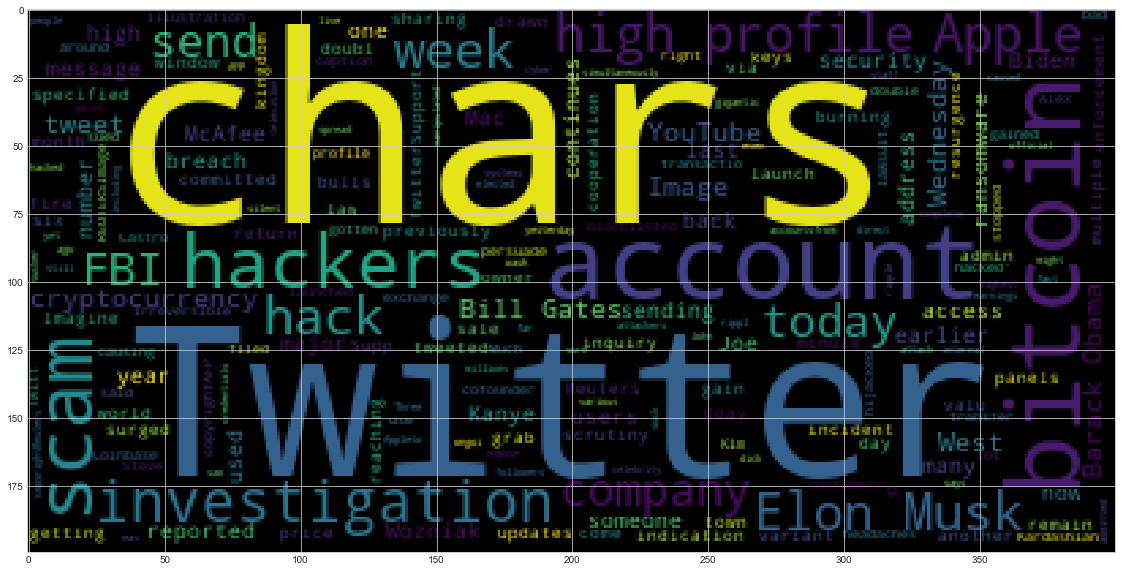

In [39]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(bitcoin_df['text'].str.cat())
plt.imshow(btc_wc)


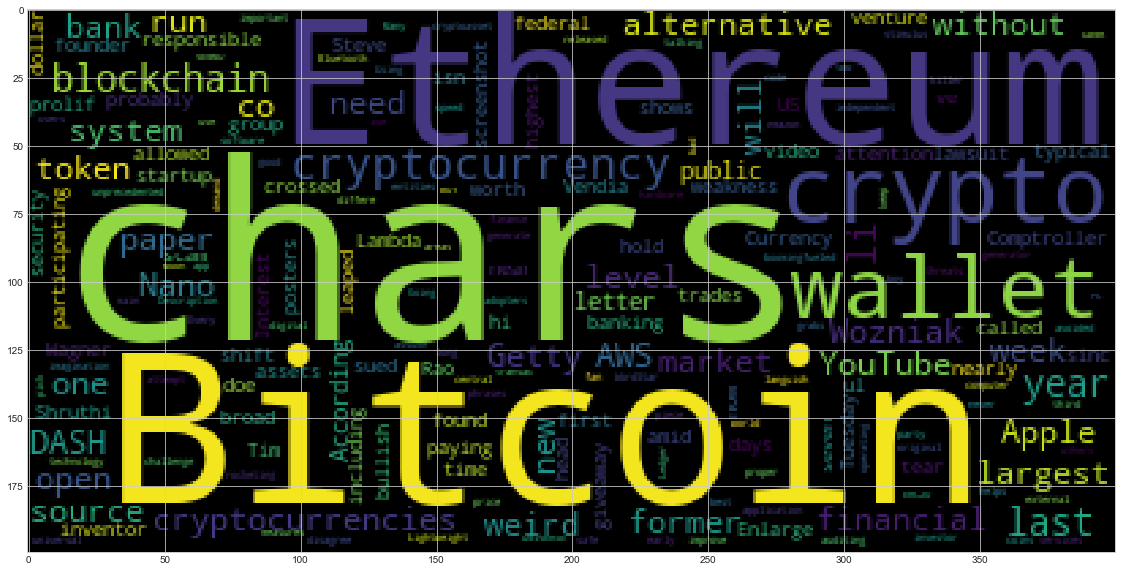

In [41]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(ethereum_df['text'].str.cat())
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [42]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [44]:
# Concatenate all of the bitcoin text together
allbtc_text = bitcoin_df['text'].str.cat()

In [47]:
# Run the NER processor on all of the text
btcdoc = nlp(allbtc_text)


# Add a title to the document

FBI ORG
FBI ORG
one CARDINAL
Bitcoin GPE
Twitter Supp ORG
chars]The NORP
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Alex Castro PERSON
around 1,100 CARDINAL
Apple ORG
YouTube LAW
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter PERSON
YouTube WORK_OF_ART
Wozniak PERSON
REUTERSImage ORG
Kanye West GPE
Elon Musk PERSON
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PRODUCT
Wednesday DATE
millions CARDINAL
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
AFP
 ORG
earlier this week DATE
last week DATE
Twitter FAC
today DATE
Q2 CARDINAL
chars]Last week DATE
over 100 CARDINAL
today DATE
+2014 chars]2020 ORG
the year DATE
John McAfee
  PERSON
Three years ago DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
Francisco PRODUCT
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk PERSON
Apple ORG
Wednesday DATE
earlier this afternoon TIME
Elon Musk PERSON
Wednesday DATE
evening TIME
6 pm TIME
Apple ORG


In [48]:
# Render the visualization
displacy.render(btcdoc, style='ent')

In [50]:
# List all Entities
for ent in btcdoc.ents:
        print(ent.text, ent.label_)

FBI ORG
FBI ORG
one CARDINAL
Bitcoin GPE
Twitter Supp ORG
chars]The NORP
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Alex Castro PERSON
around 1,100 CARDINAL
Apple ORG
YouTube LAW
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter PERSON
YouTube WORK_OF_ART
Wozniak PERSON
REUTERSImage ORG
Kanye West GPE
Elon Musk PERSON
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PRODUCT
Wednesday DATE
millions CARDINAL
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
AFP
 ORG
earlier this week DATE
last week DATE
Twitter FAC
today DATE
Q2 CARDINAL
chars]Last week DATE
over 100 CARDINAL
today DATE
+2014 chars]2020 ORG
the year DATE
John McAfee
  PERSON
Three years ago DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
Francisco PRODUCT
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk PERSON
Apple ORG
Wednesday DATE
earlier this afternoon TIME
Elon Musk PERSON
Wednesday DATE
evening TIME
6 pm TIME
Apple ORG


---

## Ethereum NER

In [32]:
# Concatenate all of the bitcoin text together
alleth_text = ethereum_df['text'].str.cat()

In [51]:
# Run the NER processor on all of the text
ethdoc = nlp(allbtc_text)
# Add a title to the document

In [52]:
# Render the visualization
displacy.render(ethdoc, style='ent')

In [53]:
# List all Entities
for ent in ethdoc.ents:
        print(ent.text, ent.label_)

FBI ORG
FBI ORG
one CARDINAL
Bitcoin GPE
Twitter Supp ORG
chars]The NORP
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Alex Castro PERSON
around 1,100 CARDINAL
Apple ORG
YouTube LAW
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter PERSON
YouTube WORK_OF_ART
Wozniak PERSON
REUTERSImage ORG
Kanye West GPE
Elon Musk PERSON
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PRODUCT
Wednesday DATE
millions CARDINAL
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
AFP
 ORG
earlier this week DATE
last week DATE
Twitter FAC
today DATE
Q2 CARDINAL
chars]Last week DATE
over 100 CARDINAL
today DATE
+2014 chars]2020 ORG
the year DATE
John McAfee
  PERSON
Three years ago DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
Francisco PRODUCT
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk PERSON
Apple ORG
Wednesday DATE
earlier this afternoon TIME
Elon Musk PERSON
Wednesday DATE
evening TIME
6 pm TIME
Apple ORG
